In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys
sys.path.append('../.')

In [214]:
def accuracy_curve(run_name:str, legend:list,save_location=None, *args):
    #save_location = check_save_path(save_location)
    #lab = "VGG16 Accuracies for varying model sizes \n Rremoving layers from the front vs removing from the back "+run_name
    font1 = {'family':'georgia','color':'darkblue','size':19}
    font2 = {'family':'georgia','color':'darkblue','size':15}
    #data= args[1:]
    for idx,arg in enumerate(args):
        #print("\n BNBNBN \n ",'idx: ', idx, '  arg: ', arg[0], 'XCXCXC', "len of arg",len(arg))
        #print("\n TYTYTYTY \n",'idx: ', idx, '  args: ', args[0], 'XCXCXC',"len of args", len(args))
        if isinstance(arg[0], str):
            #print('inst arg[0] is string')
            label = arg[0]
            start =1
            #plt.plot(range(len(args[0])-1), arg[start:], label=label)#, label =str(args[0]))
            plt.plot(range(len(arg)+1), arg[start:], label=label)#, label =str(args[0]))
        else:
            #print('arg[0] not string')
            label= legend[idx]
            start=0
        #plt.plot(range(len(args[0])), arg[start:], label=label)#, label =str(args[0]))
        #print(len(arg))
        plt.plot(range(len(arg)), arg[start:], label=label)#, label =str(args[0]))

    plt.xticks(range(len(arg)+1), rotation=90)#, list(args.keys()))
    #plt.set_xlim(1,11) #ax.set_xlim(1, 24)
    plt.title(run_name+"\n Accuracy Curve ", font1)
    plt.xlabel('Layers', font2)
    plt.ylabel('Accuracy', font2)
    #plt.yscale("log")
    plt.legend()
    if save_location != None:
        plt.savefig(save_location+'/'+run_name+'.png') #run_name
    else:
        print("Save Location Not Specified!")
    plt.show()

# Run 1

In [113]:
path = ".././Kemal/saves/ModelResults_18042024.csv"

# remove from end
df_end_12_5_path = ".././Kemal/saves/working with csvs/END/spread over 3 csvs/ModelResults_18042024.csv"
df_end_6_5_path = ".././Kemal/saves/working with csvs/END/spread over 3 csvs/ModelResults_07052024.csv"
df_end_4_3_path = ".././Kemal/saves/working with csvs/END/spread over 3 csvs/ModelResults_08052024.csv"
df_end_3_2_path = ".././Kemal/saves/working with csvs/END/ModelResults_08052024.csv"

# remove from front

#.././Kemal/saves/working with csvs/front/
#FRONT_ModelResults_13052024.csv
df_front_1_5_path = ".././Kemal/saves/working with csvs/front/FRONT_ModelResults_13052024.csv"
df_front_5_8_path =".././Kemal/saves/working with csvs/front/FRONT_ModelResults_14052024.csv"
df_front_9_11_path = ".././Kemal/saves/working with csvs/front/FRONT_ModelResults_15052024.csv"

In [114]:
#df = pd.read_csv(path)

df_end_12_5 = pd.read_csv(df_end_12_5_path)
df_end_6_5 = pd.read_csv(df_end_6_5_path)
df_end_4_3 = pd.read_csv(df_end_4_3_path)
df_end_3_2 = pd.read_csv(df_end_3_2_path)

df_front_1_5 = pd.read_csv(df_front_1_5_path)
df_front_5_8 = pd.read_csv(df_front_5_8_path)
df_front_9_11 = pd.read_csv(df_front_9_11_path)

In [133]:
df_font_6_8 = df_front_5_8.iloc[2:]

In [136]:
df_front_1_5 = df_front_1_5.iloc[1:]

In [138]:
df_front_9_11

,Starting Side,Layer Size,Epoch,Loss,Optimizer,Learning Rate,Wieght Decay,Scheduler,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy
0,Front,9,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,75,53,53
1,Front,10,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,70,51,52
2,Front,11,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,57,48,47


In [122]:
df_end_12_4 = df_end_12_5.iloc[:9]

In [123]:
df_end_12_4

,Layer Size,Epoch,Starting Side,Loss,Optimizer,Learning Rate,Wieght Decay,Scheduler,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy
0,12,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,87,67,69
1,11,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,88,73,73
2,10,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,79,69,67
3,9,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,98,80,76
4,8,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,97,74,77
5,7,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,82,66,65
6,6,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,99,77,75
7,5,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,98,74,69
8,4,5,End,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,86,65,62


In [160]:
df_all_END = pd.concat([df_end_12_4,df_end_3_2])
df_all_FRONT = pd.concat([df_front_1_5,df_font_6_8,df_front_9_11])

df_all = pd.concat([df_all_END,df_all_FRONT])

In [115]:
print(df_end_12_5.keys())


print(np.unique(df_end_12_5['Layer Size']))
print(np.unique(df_end_6_5['Layer Size']))
print(np.unique(df_end_4_3['Layer Size']))
print(np.unique(df_end_3_2['Layer Size']))

Index(['Layer Size', 'Epoch', 'Starting Side', 'Loss', 'Optimizer',
       'Learning Rate', 'Wieght Decay', 'Scheduler', 'Gamma', 'Train Accuracy',
       'Validation Accuracy', 'Test Accuracy'],
      dtype='object')
[ 4  5  6  7  8  9 10 11 12]
[5 6]
[3 4]
[2 3]


In [6]:
print(df_front_9_11.keys())


print(np.unique(df_front_1_5['Layer Size']))
print(np.unique(df_front_5_8['Layer Size']))
print(np.unique(df_front_9_11['Layer Size']))


Index(['Starting Side', 'Layer Size', 'Epoch', 'Loss', 'Optimizer',
       'Learning Rate', 'Wieght Decay', 'Scheduler', 'Gamma', 'Train Accuracy',
       'Validation Accuracy', 'Test Accuracy'],
      dtype='object')
[1 2 3 4 5]
[5 6 7 8]
[ 9 10 11]


In [116]:
#df_all = pd.concat([df_end_12_5, df_end_6_5, df_end_4_3,df_end_3_2,df_front_1_5, df_front_5_8, df_front_9_11], ignore_index=True)

#df_all_END = pd.concat([df_end_12_5, df_end_6_5, df_end_4_3,df_end_3_2])
#df_all_FRONT = pd.concat([df_front_1_5, df_front_5_8, df_front_9_11])

In [8]:
np.unique(df_all['Layer Size'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [126]:
#df_all_END2 = df_all_END.drop_duplicates(keep='first', ignore_index=True)
#print(df_all_END[(df_all_END['Layer Size'] == 12)])

   Layer Size  Epoch Starting Side                Loss Optimizer  \
0          12      5           End  Cross Entropy Loss      Adam   

   Learning Rate  Wieght Decay      Scheduler  Gamma  Train Accuracy  \
0        0.00001       0.00004  ExponentialLR    0.9              87   

   Validation Accuracy  Test Accuracy  
0                   67             69  


In [140]:
print(len(df_all_END))
print(len(df_all_FRONT))

11
11


In [37]:
print(type(df_trainAcc), len(df_trainAcc))
print(type(df_valAcc), len(df_valAcc))
print(type(df_testAcc), len(df_testAcc))

<class 'list'> 45
<class 'list'> 45
<class 'list'> 45


In [131]:
list(df_all)

['Layer Size',
 'Epoch',
 'Starting Side',
 'Loss',
 'Optimizer',
 'Learning Rate',
 'Wieght Decay',
 'Scheduler',
 'Gamma',
 'Train Accuracy',
 'Validation Accuracy',
 'Test Accuracy']

In [12]:
print(np.unique(df_all['Starting Side']))

['End' 'Front']


In [18]:
#df_all_END = df_all[(df_all['Starting Side']=="End")]
#df_all_FRONT = df_all[(df_all['Starting Side']=="Front")]

In [42]:
3*12

36

 differnece in accuracy for additional runs, same parameters, for layers.
 may have been changed in f_lin_lay size based on what was complained about... same seed

 1 - nothing
 2 - one instance
 3- two instance
 4 - three instance
 5 - four instance
 6 - five instance
 7 - five instance
 8 - five instance
 9 - five instance
 10 - seven instance
 11 - seven instance
 12 - eight instance

In [112]:
df_all_END2 = df_all_END.drop_duplicates(keep='first', ignore_index=True)
print(df_all_END2[(df_all_END2['Layer Size'] == 13)])

Empty DataFrame
Columns: [Layer Size, Epoch, Starting Side, Loss, Optimizer, Learning Rate, Wieght Decay, Scheduler, Gamma, Train Accuracy, Validation Accuracy, Test Accuracy]
Index: []


In [88]:
#df_all_FRONT = df_all_FRONT.reset_index()
#print(df_all_FRONT['Validation Accuracy'][:])
#print(type(df_all_END['Validation Accuracy'][1]))
#print(type(df_all_FRONT['Validation Accuracy'][1]))

print(len(df_all_END['Train Accuracy']), df_all_END['Train Accuracy'])
print(len(df_all_END['Validation Accuracy']))
print(len(df_all_END['Test Accuracy']))

52 0     87
1     88
2     79
3     98
4     97
5     82
6     99
7     98
8     86
9     93
10    93
11    79
12    92
13    91
14    77
15    98
16    98
17    79
18    99
19    99
20    84
21    90
22    94
23    89
24    80
25    97
26    96
27    85
28    99
29    99
30    87
31    97
32    96
33    85
34    99
35    99
36    83
37    97
38    94
39    88
40    99
41    99
42    84
43    99
44    99
45    99
46    99
47    99
48    86
49    99
50    99
51    86
Name: Train Accuracy, dtype: int64
52
52


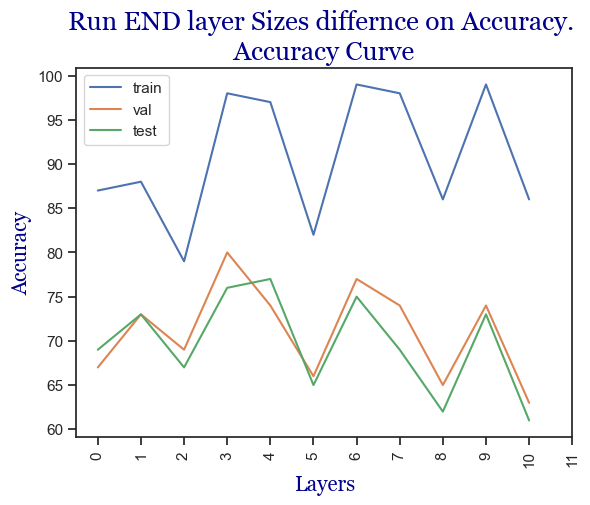

In [215]:
run_name = "END layer Sizes differnce on Accuracy. "#df['Layer Size']

accuracy_curve(f"Run {run_name}",["train", "val", "test"],r"/its/home/nn268/antvis/antvis/optics/Kemal/saves/",df_all_END['Train Accuracy'], df_all_END['Validation Accuracy'],df_all_END['Test Accuracy']) 

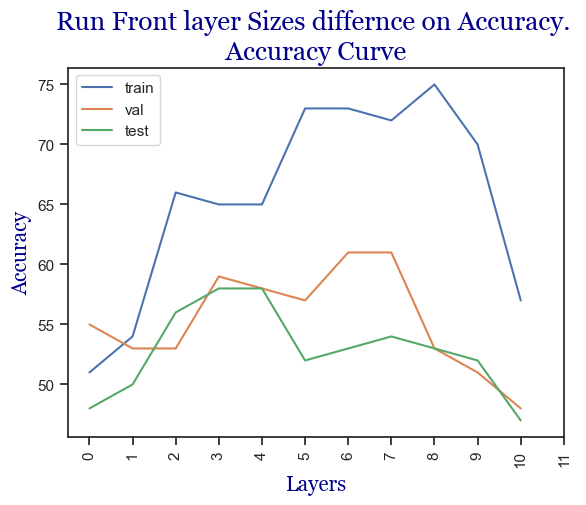

In [216]:
run_name = "Front layer Sizes differnce on Accuracy. "#df['Layer Size']

accuracy_curve(f"Run {run_name}",["train", "val", "test"],r"/its/home/nn268/antvis/antvis/optics/Kemal/saves/",df_all_FRONT['Train Accuracy'], df_all_FRONT['Validation Accuracy'],df_all_FRONT['Test Accuracy']) 

In [161]:
list(df_all)

['Layer Size',
 'Epoch',
 'Starting Side',
 'Loss',
 'Optimizer',
 'Learning Rate',
 'Wieght Decay',
 'Scheduler',
 'Gamma',
 'Train Accuracy',
 'Validation Accuracy',
 'Test Accuracy']

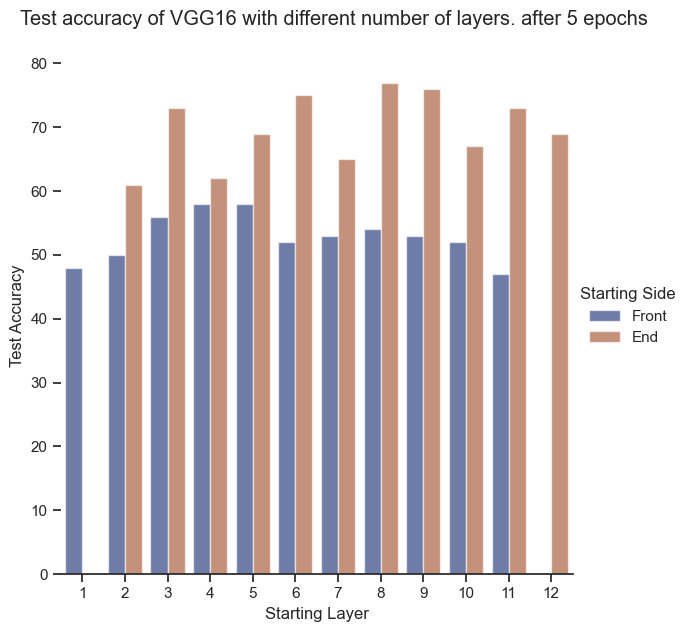

In [217]:
#g= sns.FacetGrid(df_all, row='Learning Rate', col='Starting Side',margin_titles=True)
"""
sns.boxplot(x = "Layer Size", y= "Test Accuracy",
           hue = 'Starting Side', palette =['m', 'g'],
           data =df_all)
sns.despine(offset=10, trim=True)"""

g = sns.catplot(
    data=df_all, kind="bar",
    x="Layer Size", y="Test Accuracy", hue="Starting Side",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    
)
fig = g.fig
g.despine(left=True)
g.set_axis_labels("Starting Layer", "Test Accuracy")
#g.legend.set_title("effect on Test accuracy of removing layers from VGG16. after 5 epochs")
fig.suptitle("Test accuracy of VGG16 with different number of layers. after 5 epochs", y=1.05)
plt.savefig(r"/its/home/nn268/antvis/antvis/optics/Kemal/saves"+'/'+"hist_fE_layers"+'.png') #run_name

/tmp/ipykernel_63655/4071125431.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.relplot(


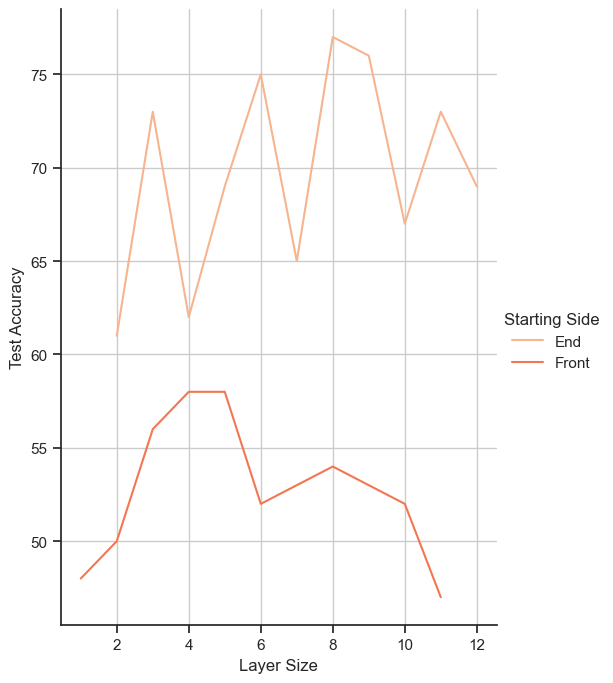

In [220]:
import seaborn as sns
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

#g = sns.FacetGrid(df_all)
# Plot the lines on two facets
sns.relplot(
    data=df_all,
    x="Layer Size", y="Test Accuracy",
    hue="Starting Side",
    kind="line", palette=palette,
    height=7, aspect=.75, facet_kws=dict(), #sharex=False
)
plt.grid()

fig =g.fig
fig.suptitle("effect on Test accuracy of removing layers from VGG16. after 5 epochs", y=1.05)
plt.savefig(r"/its/home/nn268/antvis/antvis/optics/Kemal/saves"+'/'+"line_fE_layers"+'.png') #run_name
plt.show()

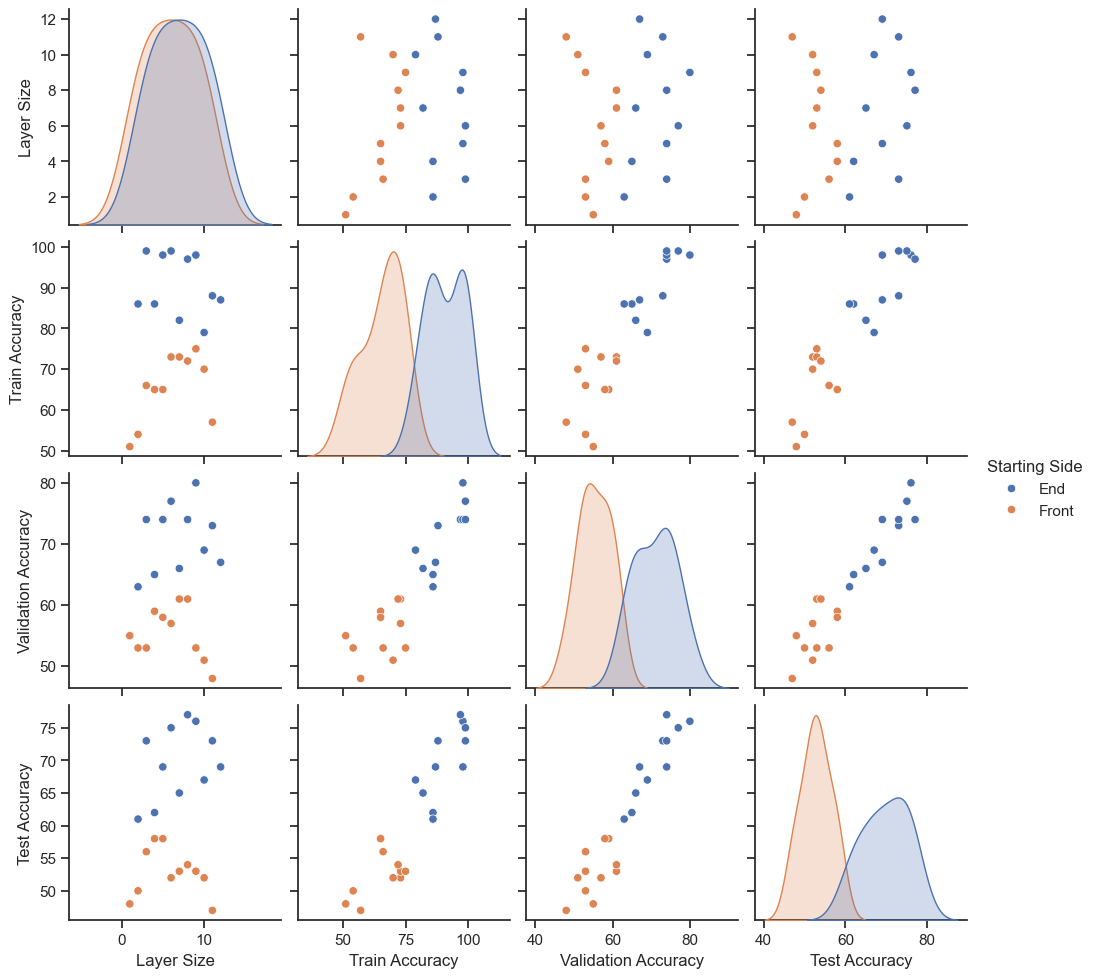

In [219]:
df_all_acc = df_all[['Layer Size','Train Accuracy', 'Validation Accuracy', 'Test Accuracy', 'Starting Side']]
sns.pairplot(df_all_acc, hue="Starting Side")
plt.savefig(r"/its/home/nn268/antvis/antvis/optics/Kemal/saves"+'/'+"pairgrid_fE_layers"+'.png') #run_name

<Axes: xlabel='Layer Size', ylabel='Test Accuracy'>

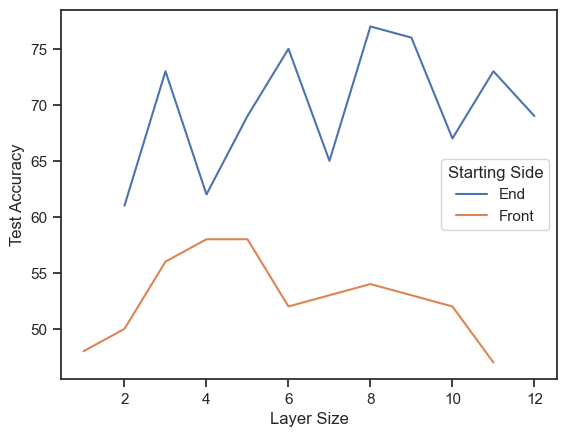

In [186]:
#g = sns.FacetGrid(df_all_acc, row="", col="", margin_titles= True)
#g.map(sns.lineplot, "Layer Size", "Test Accuracy")

sns.lineplot(data=df_all_acc,x="Layer Size", y="Test Accuracy", hue="Starting Side")

In [205]:
#df_1_accuracies = df_all[["Train Accuracy","Validation Accuracy","Test Accuracy"]]

#df_1_accuracies.plot.box()


###

"""g = sns.catplot(
    data= df_ALL_same_params, kind= "box",
    x="resolution", y="test_acc", hue='condition', row='mod', col='loss_fn',
    errorbar="sd", palette="colorblind", height=6 # alpha=.6,
)
#g.title("sched val 0, learning rate 1e-4, wd=0") #scheduler value"] == 0) & (df_ALL['lr'] == 1.e-04) & (df_ALL['wd'] ==0)]
for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
#"""

'g = sns.catplot(\n    data= df_ALL_same_params, kind= "box",\n    x="resolution", y="test_acc", hue=\'condition\', row=\'mod\', col=\'loss_fn\',\n    errorbar="sd", palette="colorblind", height=6 # alpha=.6,\n)\n#g.title("sched val 0, learning rate 1e-4, wd=0") #scheduler value"] == 0) & (df_ALL[\'lr\'] == 1.e-04) & (df_ALL[\'wd\'] ==0)]\nfor ax in g.axes_dict.values():\n    g.tick_params(axis=\'x\', rotation=90)\n    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)\n#'

In [206]:
#sns.boxplot(x="Wieght Decay", y="Test Accuracy", hue="Gamma", palette=["m", "g", "r", "y", "b"], data=df_all)

In [54]:
print(list(df))

print(np.unique(df['Loss']))
print(np.unique(df['Optimizer']))
print(np.unique(df['Learning Rate']))
print(np.unique(df['Wieght Decay']))
print(np.unique(df['Scheduler']))
print(np.unique(df['Gamma']))
print(np.unique(df['Starting Side']))

['Layer Size', 'Epoch', 'Starting Side', 'Loss', 'Optimizer', 'Learning Rate', 'Wieght Decay', 'Scheduler', 'Gamma', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy']
['Cross Entropy Loss']
['Adam']
[1.e-05]
[4.e-05]
['ExponentialLR']
[0.9]
['End']


/tmp/ipykernel_63655/181425482.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x="Layer Size", y="Test Accuracy", hue="Starting Side", palette=["m", "g", "r", "y", "b"], data=df_all)


<Axes: xlabel='Layer Size', ylabel='Test Accuracy'>

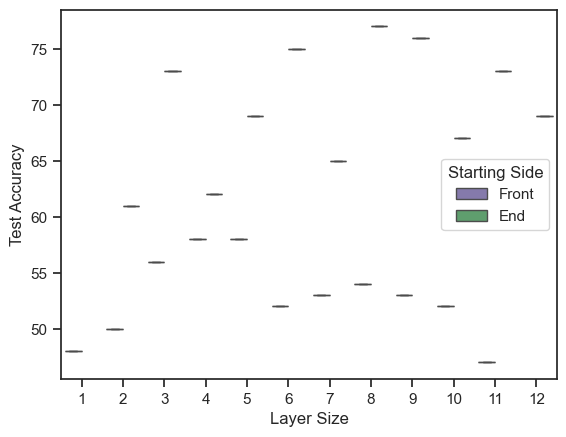

In [204]:
sns.boxplot(x="Layer Size", y="Test Accuracy", hue="Starting Side", palette=["m", "g", "r", "y", "b"], data=df_all)

In [207]:
#sns.boxplot(x="Layer Size", y="Validation Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df_all)

In [208]:
#sns.boxplot(x="Layer Size", y="Train Accuracy", hue="Loss", palette=["m", "g", "r", "y", "b"], data=df_all)

In [72]:
#print(df.loc[0])

#title = str(df_b_2c2l_452144.loc[[0], ["loss_fn", "lr", "wd", "scheduler value", "seed"]])
df_layers = df[['Layer Size', 'Test Accuracy']]
#accuracy_curve(f"Run {run_name}",["train", "val", "test"],None,df_trainAcc, df_valAcc,df_testAcc) 




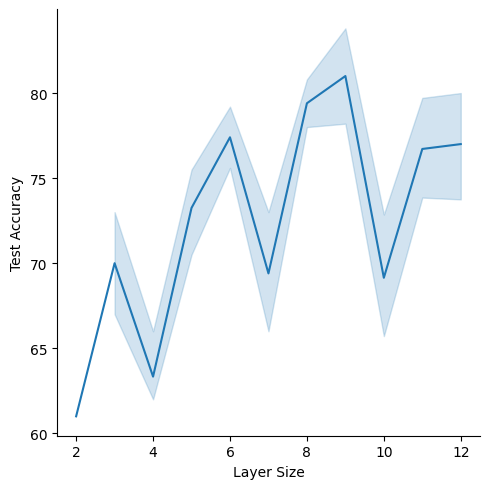

In [140]:
sns.relplot(data=df_all, x="Layer Size", y="Test Accuracy", kind="line")

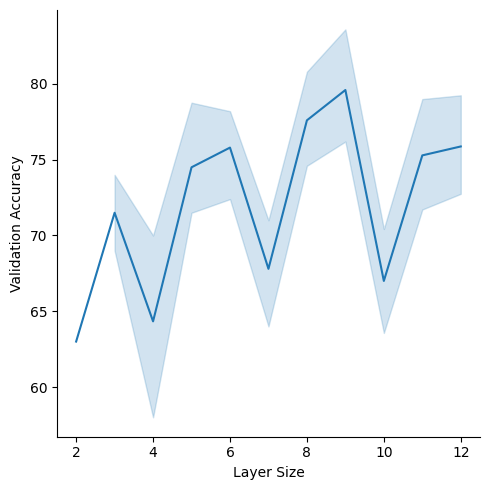

In [141]:
sns.relplot(data=df_all, x="Layer Size", y="Validation Accuracy", kind="line")

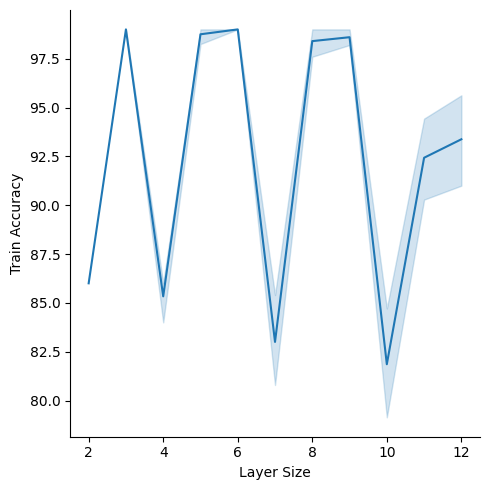

In [142]:
sns.relplot(data=df_all, x="Layer Size", y="Train Accuracy", kind="line")

# Run 2

In [249]:
endpath = ".././Kemal/saves/working with csvs/run2/END_ModelResults_20052024.csv"
frontpath = ".././Kemal/saves/working with csvs/run2/TESTING_FRONT_ModelResults_20052024.csv"

df_end_2 = pd.read_csv(endpath)
df_front_2 = pd.read_csv(frontpath)

In [257]:
df_end_2 = df_end_2.drop_duplicates(keep='first', ignore_index=False)
df_front_2 = df_front_2.drop_duplicates(keep='first', ignore_index=False)

In [259]:
df_front_2 = df_front_2[9:]

In [262]:
df_front_2.reset_index(inplace=True)

In [251]:
df_end_2 = df_end_2[12:]
df_end_2.reset_index(inplace=True)

In [253]:
df_end_2

,index,Starting Side,Layer Size,Epoch,Loss,Optimizer,Learning Rate,Wieght Decay,Scheduler,Gamma,Train Accuracy,Validation Accuracy,Test Accuracy
0,12,End,12,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,12,10,10
1,13,End,11,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,12,9,10
2,14,End,10,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,12,10,9
3,15,End,9,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,13,12,11
4,16,End,8,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,10,10,10
5,17,End,7,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,11,11,10
6,18,End,6,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,10,11,10
7,19,End,5,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,12,12,10
8,20,End,4,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,10,10,10
9,21,End,3,5,Cross Entropy Loss,Adam,0.00001,0.00004,ExponentialLR,0.9,14,11,11


In [254]:
print(type(df_end_2['Train Accuracy'][0]))

<class 'numpy.int64'>


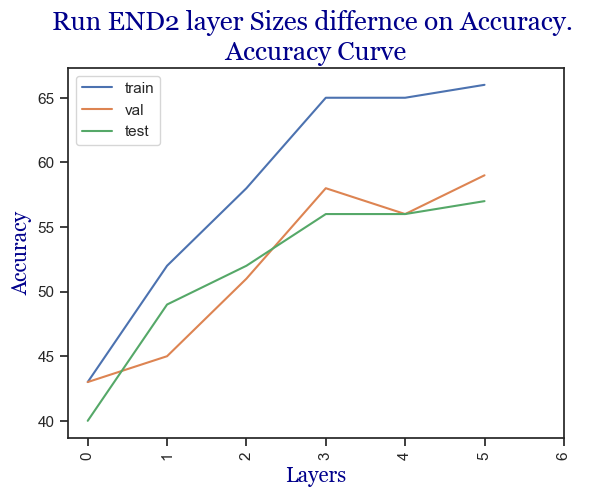

In [263]:
run_name = "END2 layer Sizes differnce on Accuracy. "#df['Layer Size']

accuracy_curve(f"Run {run_name}",["train", "val", "test"],r"/its/home/nn268/antvis/antvis/optics/Kemal/saves/",df_front_2['Train Accuracy'], df_front_2['Validation Accuracy'],df_front_2['Test Accuracy']) 

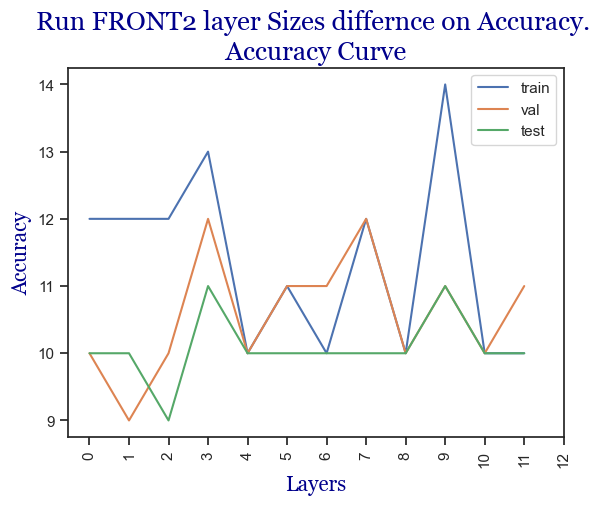

In [264]:
run_name = "FRONT2 layer Sizes differnce on Accuracy. "#df['Layer Size']

accuracy_curve(f"Run {run_name}",["train", "val", "test"],r"/its/home/nn268/antvis/antvis/optics/Kemal/saves/",df_end_2['Train Accuracy'], df_end_2['Validation Accuracy'],df_end_2['Test Accuracy']) 